In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('cars-dataset.xlsx')

In [3]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0


EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [6]:
df.shape

(398, 8)

In [7]:
df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.804203
hp,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
wt,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,1.000000


C:\Users\SRAMASA9\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\SRAMASA9\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


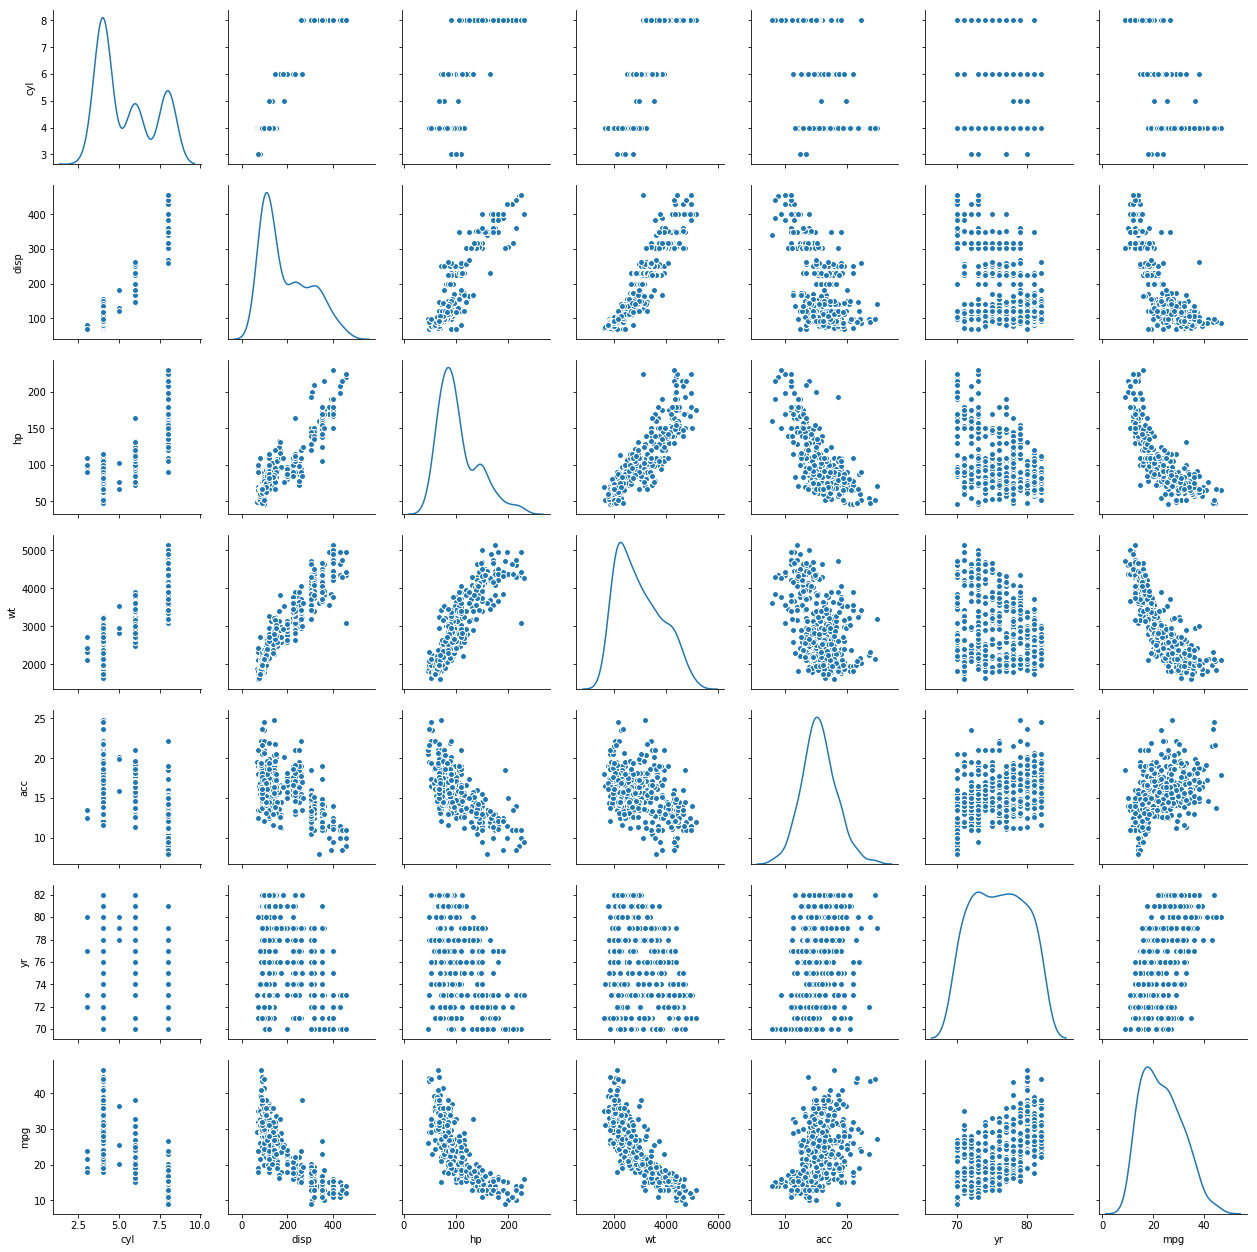

In [8]:
## Pair plot to visualize the data

g = sns.pairplot(df,diag_kind='kde')

In [11]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 5 columns):
disp    398 non-null float64
hp      392 non-null float64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(1)
memory usage: 15.6 KB


In [ ]:
## Cylinder & Displacement are highly correlated
## Displacement & Weight are highly correlated
## Dropping cyl & wt

In [9]:
df_cars=df.drop(['car name','cyl','wt'],axis=1)


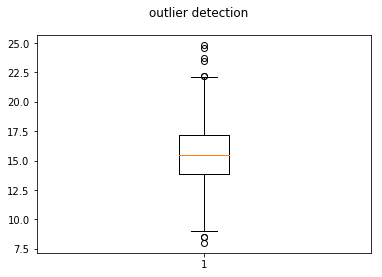

In [20]:

fig = plt.figure()
fig.suptitle('outlier detection')
ax = fig.add_subplot(111)
plt.boxplot(df['acc'])
##ax.set_xticklabels(names)
plt.show()

## 'acc' has outliers 

In [ ]:
## Convert hp from object to numeric , to remove NaN 

In [16]:
from sklearn.preprocessing import normalize

In [17]:
df_cars['hp']=df_cars.hp.convert_objects(convert_numeric=True)


C:\Users\SRAMASA9\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [18]:
df_cars.isna().sum()

disp    0
hp      6
acc     0
yr      0
mpg     0
dtype: int64

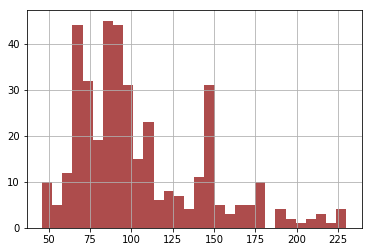

In [21]:
df_cars['hp'].hist(bins=30,color='darkred',alpha=0.7)

In [23]:
df_cars['hp'].median()

93.5

In [ ]:
## Remove NaN from 'hp' feature

In [24]:

df_cars = df_cars[np.isfinite(df_cars['hp'])]

In [25]:
df_cars.shape

(392, 5)

In [26]:
## No non numerical values
df_cars.isna().sum()

disp    0
hp      0
acc     0
yr      0
mpg     0
dtype: int64

In [ ]:
## Applying Hierarchial clustering to find optimal number of clusters

In [27]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist 
##from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import normalize

In [28]:
#Normalizing data
data_scaled = normalize(df_cars)
data_scaled = pd.DataFrame(data_scaled, columns=df_cars.columns)
data_scaled.head()


,disp,hp,acc,yr,mpg
0,0.899381,0.380845,0.035155,0.205071,0.052732
1,0.889052,0.419124,0.029212,0.177810,0.038102
2,0.885492,0.417685,0.030630,0.194920,0.050122
3,0.876784,0.432624,0.034610,0.201891,0.046147
4,0.886308,0.410871,0.030815,0.205436,0.049892


In [29]:
Y = pdist(data_scaled, 'euclidean')
Z = linkage(Y, 'average')
c, coph_dists = cophenet(Z , pdist(data_scaled))

print('Cophenet Distance calculation',c)

print('Linkage Matrix as follows')
Z

Cophenet Distance calculation 0.8492057032930637
Linkage Matrix as follows


array([[8.00000000e+00, 1.30000000e+01, 0.00000000e+00, 2.00000000e+00],
       [2.06000000e+02, 2.13000000e+02, 2.21931860e-03, 2.00000000e+00],
       [3.80000000e+01, 6.20000000e+01, 2.49389092e-03, 2.00000000e+00],
       ...,
       [7.76000000e+02, 7.78000000e+02, 1.96684069e-01, 2.17000000e+02],
       [7.44000000e+02, 7.80000000e+02, 2.93783875e-01, 2.21000000e+02],
       [7.79000000e+02, 7.81000000e+02, 3.76927280e-01, 3.92000000e+02]])

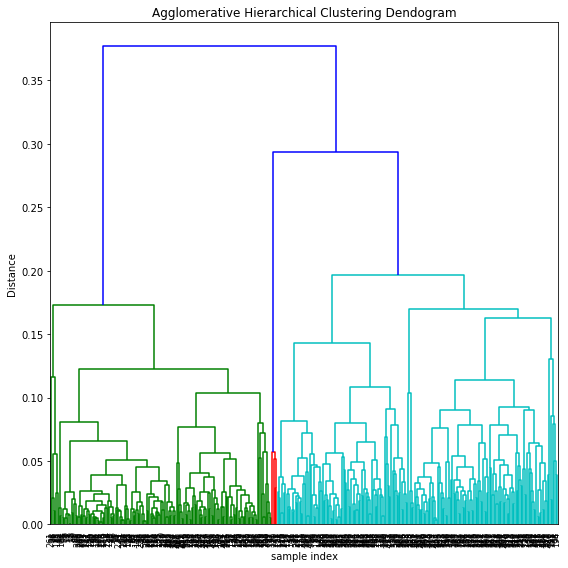

In [30]:
plt.figure(figsize=(8, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8. )
plt.tight_layout()

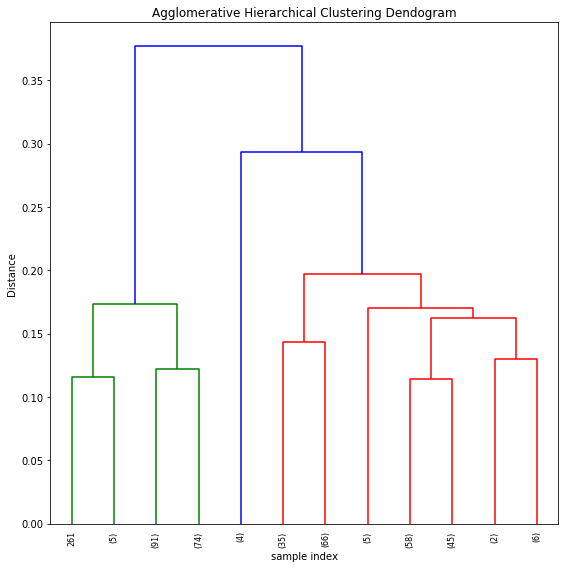

In [31]:
plt.figure(figsize=(8, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,p=12, truncate_mode='lastp' ,leaf_font_size=8. )
plt.tight_layout()

Optimal clusters is 3 , The horizantal line exactly cuts at y=0.21, where we can get 3 clusters


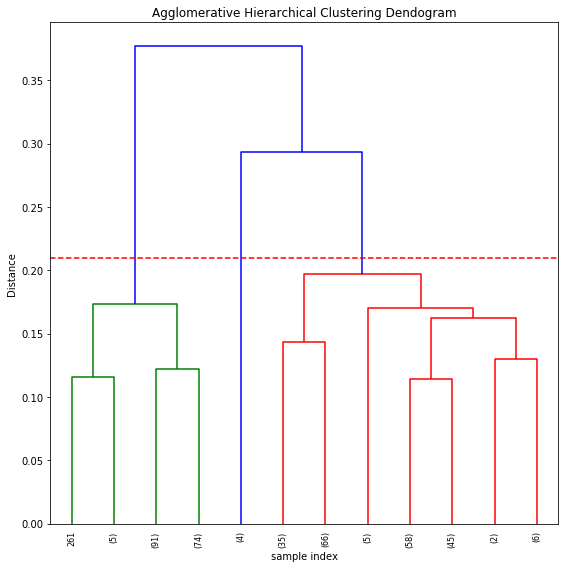

In [38]:
plt.figure(figsize=(8, 8))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,p=12, truncate_mode='lastp' ,leaf_font_size=8. )
plt.tight_layout()
plt.axhline(y=0.21, color='r', linestyle='--')

print('Optimal clusters is 3 , The horizantal line exactly cuts at y=0.21, where we can get 3 clusters')

In [39]:
fcluster(Z,t=0.21,criterion='distance')


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3,
       2, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3,

In [61]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_samples, silhouette_score
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(data_scaled)
model.labels_ 

silhouette_avg = silhouette_score(data_scaled, model.labels_)
print("Clustering validation using silhoutte score",silhouette_avg)

Clustering validation using silhoutte score 0.8825280014870353


In [41]:
data_scaled.insert(5, "Cluster", model.labels_, True)

In [42]:
 
##data_scaled.drop(['Clusters'],axis=1,inplace=True)

In [43]:
data_scaled.head()

,disp,hp,acc,yr,mpg,Cluster
0,0.899381,0.380845,0.035155,0.205071,0.052732,1
1,0.889052,0.419124,0.029212,0.177810,0.038102,1
2,0.885492,0.417685,0.030630,0.194920,0.050122,1
3,0.876784,0.432624,0.034610,0.201891,0.046147,1
4,0.886308,0.410871,0.030815,0.205436,0.049892,1


In [57]:
##Split the group into three datasets based on cluster groups

df_zero=data_scaled.loc[data_scaled['Cluster'] == 0]
df_one=data_scaled.loc[data_scaled['Cluster'] == 1]
df_two=data_scaled.loc[data_scaled['Cluster'] == 2]



,disp,hp,acc,yr,mpg,Cluster


In [86]:
## Applying the data to Linear Regression algorithm to find out the intercept & Coeff for each clusters

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [78]:
x=df_zero.drop(['mpg','Cluster'],axis=1)
y=df_zero['mpg']

linRegcheckModelPerformance(x,y)

,trainData
dataSize,217
rmse,0.0138299
rmsePct,7.60543
r2,0.934437
adjR2,0.9332
Coefficient,"[-1.5143079111953017, -1.111667013020488, -0.6..."
Intercept,2.0762


In [79]:
x=df_one.drop(['mpg','Cluster'],axis=1)
y=df_one['mpg']

linRegcheckModelPerformance(x,y)

,trainData
dataSize,171
rmse,0.00689424
rmsePct,12.9279
r2,0.891832
adjR2,0.889226
Coefficient,"[-0.9402569293546214, -0.4916661733863653, -0...."
Intercept,1.05159


In [80]:
x=df_two.drop(['mpg','Cluster'],axis=1)
y=df_two['mpg']

linRegcheckModelPerformance(x,y)

,trainData
dataSize,4
rmse,2.77556e-17
rmsePct,1.97942e-14
r2,1
adjR2,1
Coefficient,"[-0.5013513648878706, -0.23824134640704878, -0..."
Intercept,0.624714


In [ ]:
##Function to perform linear regression algorithm

In [77]:
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

def linRegcheckModelPerformance(x, y):
    model = LinearRegression()
    # Covert data into train and test
    ##x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 1)
    # Build model with train data set
    model.fit(x, y)
    # Train accuracies
    trainR2 = model.score(x, y)
    predictedSales = model.predict(x)
    mse = metrics.mean_squared_error(predictedSales, y)
    trainRmse = np.sqrt(mse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y)))*100
    trainAdjR2 = AdjRsquare(model, x, y)
    traincoeff=model.coef_
    trainintercept=model.intercept_
    trainAccuracies = [len(y), trainRmse, trainRmsePct, trainR2, trainAdjR2,traincoeff,trainintercept]
    
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2","Coefficient","Intercept"])
    resultsDf['trainData'] = trainAccuracies
    

    return ( round(resultsDf, 4))



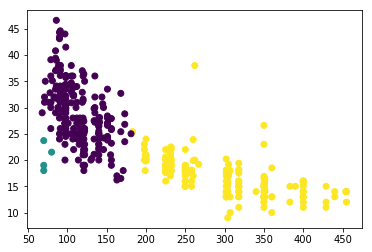

In [68]:
plt.scatter(df_cars['disp'],df_cars['mpg'],c=model.labels_)

In [85]:
print('Conclusion :\n1.Found 3 Optimal clusters using Hierarchial clustering')
print('2.Silhoutte Scores is ',silhouette_avg,'Close to 1 , high value indicates that the object is well matched with its own cluster')

print('3.R2 & Adjusted R2 represents the coefficient of determination, Here R2 value is close to 1 , so the data is closely fitted to the regression line ')

Conclusion :
1.Found 3 Optimal clusters using Hierarchial clustering
2.Silhoutte Scores is  0.8825280014870353 Close to 1 , high value indicates that the object is well matched with its own cluster
3.R2 & Adjusted R2 represents the coefficient of determination, Here R2 value is close to 1 , so the data is closely fitted to the regression line 
